## Project: Predicting Bank Deposit using Machine Learning
## 1.1 Phát biểu bài toán
Gửi tiền tại ngân hàng là một hoạt động quan trọng giúp ngân hàng duy trì nguồn vốn và phát triển các dịch vụ tài chính. Việc dự đoán chính xác liệu một khách hàng có quyết định gửi tiền hay không có thể giúp ngân hàng tối ưu hóa chiến lược tiếp thị, tập trung vào các khách hàng tiềm năng và giảm chi phí tiếp cận không hiệu quả. Dự án này sử dụng tập dữ liệu bank.csv, một tập dữ liệu phổ biến trong lĩnh vực học máy, để phân tích các yếu tố quyết định deposit của khách hàng . 

Tập dữ liệu này bao gồm 11,162 bản ghi và 17 thuộc tính ban đầu, bao gồm các thông tin cá nhân của khách hàng như tuổi tác, nghề nghiệp, tình trạng hôn nhân, trình độ học vấn, số dư tài khoản, và các yếu tố liên quan đến chiến dịch tiếp thị như thời gian cuộc gọi, phương thức liên lạc, và kết quả của chiến dịch trước đó. Mục tiêu là xây dựng một mô hình học máy để dự đoán khả năng một khách hàng sẽ gửi tiền, phân loại khách hàng vào hai nhóm: gửi tiền (deposit = yes) hoặc không gửi tiền (deposit = no).

## 1.2 Mô tả vấn đề
Sử dụng tập dữ liệu bank.csv để xây dựng một mô hình học máy nhằm dự đoán khả năng một khách hàng sẽ gửi tiền tại ngân hàng dựa trên các thông tin cá nhân và lịch sử tương tác của họ. Mô hình sẽ phân loại khách hàng thành hai nhóm: gửi tiền hoặc không gửi tiền.

## 1.3 Giả thuyết
Một số yếu tố có thể ảnh hưởng đến khả năng khách hàng gửi tiền tại ngân hàng:

- duration:Thời gian liên lạc
- banlance: Số dư tài khoản 
- age : Độ tuổi khách hàng 
- day: Ngày trong tháng 
- month : tháng trong năm 

## 1.4 Quy trình thực hiện
## 1.4.1 General Overview: Tổng quan chung về dữ liệu

Dữ liệu có tổng cộng 11,162 bản ghi và 17 thuộc tính. 

Các thuộc tính bao gồm các thông tin cá nhân của khách hàng (tuổi, nghề nghiệp, tình trạng hôn nhân, trình độ học vấn, số dư tài khoản) và các yếu tố liên quan đến chiến dịch tiếp thị (thời gian cuộc gọi, phương thức liên lạc, kết quả chiến dịch trước đó). Biến mục tiêu là deposit, với phân phối gần cân bằng: 52.64% khách hàng không gửi tiền (deposit = 0) và 47.36% khách hàng gửi tiền (deposit = 1).

## 1.4.2 Xử lý dữ liệu
Xử lý dữ liệu thiếu: Dựa trên phân tích, tập dữ liệu không có giá trị thiếu, nên không cần xử lý thêm.

Tóm tắt thống kê dữ liệu 

## 1.4.3  Phân tích dữ liệu 
1. Dùng Random Forget để giữ lại những biến quan trọng. 
- Mã hóa biến định tính bằng LabelEncoder
-Sử dụng mô hình Random Forest với 100 cây quyết định (n_estimators=100) để đánh giá tầm quan trọng của các đặc trưng (feature_importance) được tính dựa trên mức độ ảnh hưởng của mỗi biến đến dự đoán của mô hình.
- Trực quan hóa các đặc rưng và tầm quan trọng 

2. Tách các biến quan trọng thành biến liên tục và biến rời rạc .
- Biến liên tục thì sử dụng heatmap và boxplot để biểu diễn mối quan hệ tuyến tính với biến mục tiêu cũng như so sánh phân phối giữa 2 nhóm yes và no của deposit.
- Biến rời rạc : Dùng histogram bằng sns.histplot đẻ phân phối biến rời rạc theo deposit.

## 1.4.4 Model Building: Xây dựng mô hình học máy
## Sử dụng GLM để định lượng ảnh hưởng của các biến quan trọng với deposit . 
- Kiểm tra phân phối của bién mục tiêu (yes: 47.4% , no : 52.6%) 
- Chia dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%) để xây dựng và đánh giá mô hình.
- Kiểm tra xem có đa cộng tuyến giữa các biến liên tục hay không (một giả định quan trọng của GLM). Bằng cách tính chỉ số VIF (Variance Inflation Factor) cho các biến liên tục.
- Độc lập quan sát :Kiểm tra giả định rằng các quan sát (khách hàng) là độc lập.
- Chạy GLM
- Kiểm tra tính tuyến tính :Kiểm tra giả định của GLM rằng log-odds của deposit có mối quan hệ tuyến tính với các biến liên tục.
Cách thực hiện:
1. Tính xác suất dự đoán (y_pred_prob) từ mô hình GLM.
2. Tính log-odds: log(P/(1-P)).
3. Vẽ biểu đồ phân tán (scatter plot) giữa log-odds và từng biến liên tục, kèm theo đường hồi quy (màu đỏ).
- Phân tích GLM cho bién rời rạc bằng cách vẽ barplot và boxplot 
- phân tích chi tiết kết của GLM và hiệu ứng các biến 

## 1.4.5 : kết luận






## 1. Import các thư viện cần thiết

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

## 2. Đọc dữ liệu từ file CSV

In [50]:
df = pd.read_csv('bank.csv')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## 3. Kiểm tra thông tin cơ bản của dữ liệu

In [51]:
df.info() # xem cấu trúc data và nội dung của data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


- Có 11162 quan sát, 17 cột.
- Biến định lượng (int64): age, balance, day, duration, campaign, pdays, previous.
- Biến định tính (object): job, marital, education, default, housing, loan, contact, month, poutcome, deposit.
- Không có giá trị thiếu (Non-Null Count = 11162 cho tất cả cột).

## 4. Kiểm tra giá trị thiếu

In [52]:
# kiểm tra lại xem data có giá trị thiếu hay không
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

- Đầu ra: Tất cả cột có 0 giá trị thiếu.
Nhận xét:
- Dữ liệu sạch, sẵn sàng cho các bước phân tích tiếp theo.
- Không có giá trị thiếu => Không làm sai lệch mô hình GLM.

## 5. Tóm tắt thống kê của dữ liệu

In [53]:
summary = df.describe(include='all')
summary


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


Từ kết quả thống kê ta thấy :
1. Biến định lượng:
- age: Độ tuổi trung bình là 41.23, dao động từ 18 đến 95, phân bố khá rộng (độ lệch chuẩn 11.91).
- balance: Số dư tài khoản trung bình là 1,528.54, nhưng có giá trị âm (min = -6847) và giá trị rất lớn (max = 81204), độ lệch chuẩn cao (3,225.41), cho thấy phân bố không đồng đều.
- duration: Thời gian liên lạc trung bình là 371.99 giây, dao động từ 2 đến 3,881 giây, độ lệch chuẩn lớn (347.13).
- day: Ngày liên lạc trung bình là 15.66, dao động từ 1 đến 31 (phù hợp với ngày trong tháng).
- campaign, pdays, previous: Các biến này có giá trị trung bình thấp, nhưng giá trị tối đa lớn, cho thấy có một số quan sát bất thường (outlier).
2. Biến định tính:
- job: Nghề nghiệp phổ biến nhất là management (2,566 khách hàng).
- marital: Tình trạng hôn nhân phổ biến là married (6,351 khách hàng).
- education: Trình độ học vấn phổ biến là secondary (5,476 khách hàng).
- default, housing, loan: Phần lớn khách hàng không có nợ xấu (no: 10,994), không có vay mua nhà (no: 5,881), và không có vay cá nhân (no: 9,702).
- month: Tháng phổ biến nhất là may (2,824 khách hàng).
- deposit: Có 5,873 khách hàng không gửi tiền (no) và 5,289 khách hàng gửi tiền (yes), dữ liệu khá cân bằng.

## 6.Sử dụng Random Forget để giữ các biến quan trọng 


Tầm quan trọng của các đặc trưng (Feature Importance):


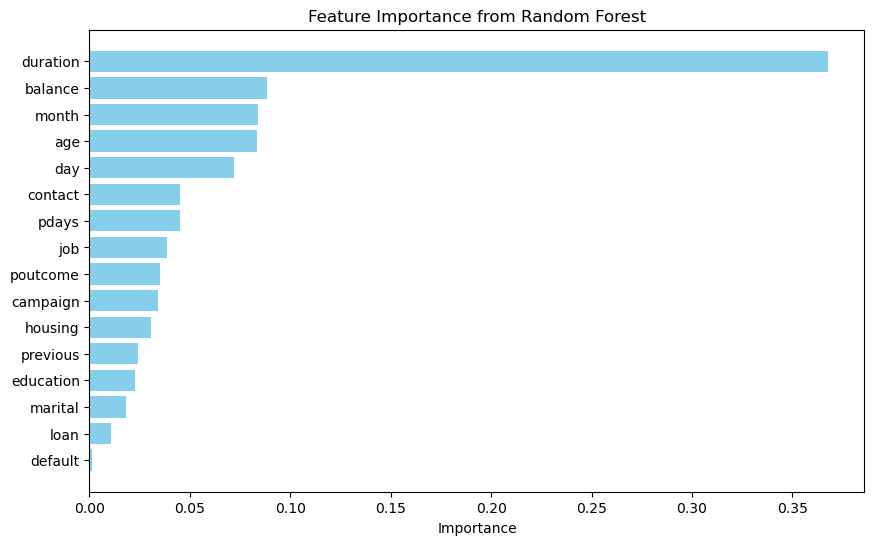


Các biến quan trọng được giữ lại: ['duration', 'balance', 'month', 'age', 'day']


,duration,balance,month,age,day,deposit
0,1042,2343,8,59,5,1
1,1467,45,8,56,5,1
2,1389,1270,8,41,5,1
3,579,2476,8,55,5,1
4,673,184,8,54,5,1


In [54]:
# 6.1: Mã hóa các biến định tính để huấn luyện Random Forest
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'month', 'poutcome', 'deposit']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# 6.2: Chia dữ liệu thành features (X) và target (y)
X_temp = df.drop('deposit', axis=1)
y_temp = df['deposit']

# 6.3: Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_temp, y_temp)

# 6.4: Lấy tầm quan trọng của các đặc trưng
feature_importance = pd.Series(rf_model.feature_importances_, index=X_temp.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# 6.5: Hiển thị tầm quan trọng của các đặc trưng
print("\nTầm quan trọng của các đặc trưng (Feature Importance):")
importance_df = pd.DataFrame({'Feature': feature_importance.index, 'Importance': feature_importance.values})
importance_df

# 6.6: Vẽ biểu đồ tầm quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# 6.7: Chọn các biến quan trọng (giữ lại các biến có tầm quan trọng > 0.05)
important_features = feature_importance[feature_importance > 0.05].index.tolist()
print("\nCác biến quan trọng được giữ lại:", important_features)

# 6.8: Tạo DataFrame mới chỉ chứa các biến quan trọng và deposit
df = df[important_features + ['deposit']]
df.head()

## 7. Tách biến liên tục và rời rạc

In [55]:
# 7.1: Tách features (X) và target (y)
continuous_vars = []
discrete_vars = []

for col in df.columns:
    if col != 'deposit':
        if df[col].dtype in ['int64', 'float64'] and df[col].nunique() > 15:
            continuous_vars.append(col)
        else:
            discrete_vars.append(col)

print("\nBiến liên tục:", continuous_vars)
print("Biến rời rạc:", discrete_vars)


Biến liên tục: ['duration', 'balance', 'age', 'day']
Biến rời rạc: ['month']


## 8. Phân tích biến liên tục - Ma trận tương quan và Boxplot

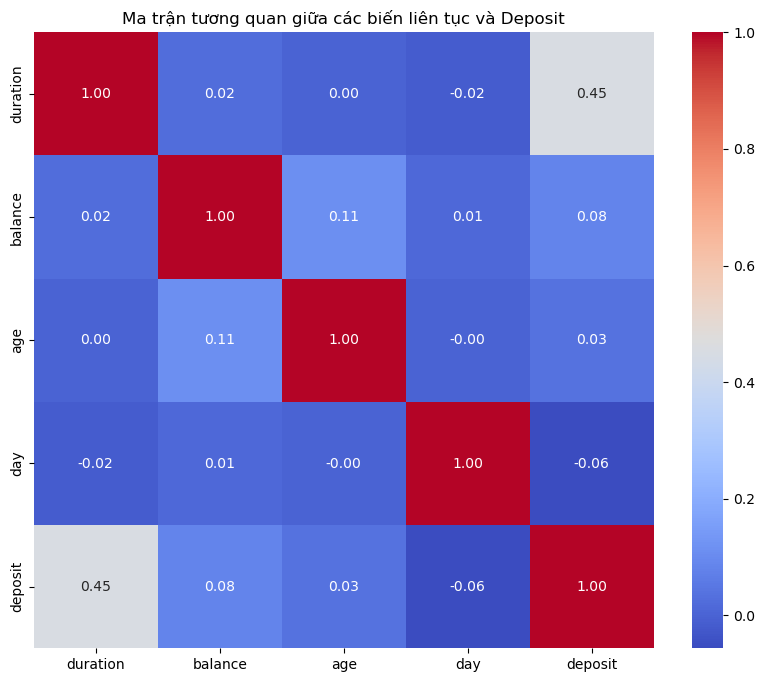

In [56]:
# Heatmap: Ma trận tương quan giữa các biến liên tục và deposit
if len(continuous_vars) > 0:
    heatmap_data = df[continuous_vars].copy()
    heatmap_data['deposit'] = df['deposit']
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Ma trận tương quan giữa các biến liên tục và Deposit')
    plt.show()

Heatmap cho thấy:
- duration có tương quan mạnh nhất với deposit (0.45).
- balance (0.081), age (0.035), và day (-0.056) có tương quan yếu.

=> Tương quan giữa các biến liên tục rất thấp, không có dấu hiệu đa cộng tuyến.

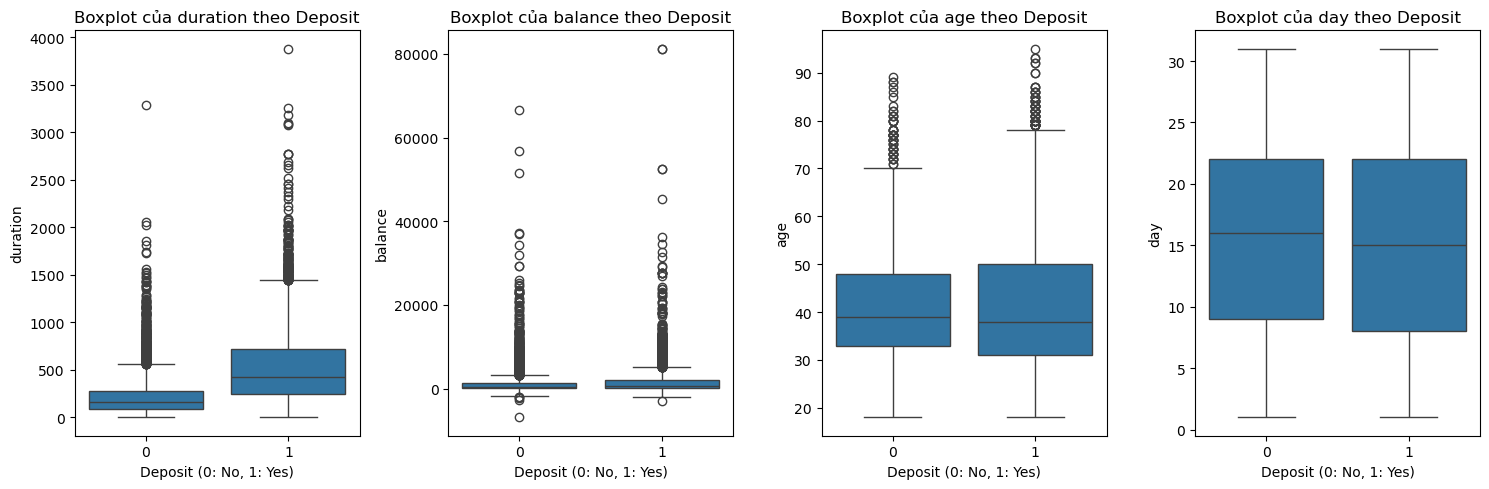

In [57]:
# Boxplot: Phân phối của các biến liên tục theo deposit
if len(continuous_vars) > 0:
    plt.figure(figsize=(15, 5))
    for i, var in enumerate(continuous_vars, 1):
        plt.subplot(1, len(continuous_vars), i)
        sns.boxplot(x='deposit', y=var, data=df)
        plt.title(f'Boxplot của {var} theo Deposit')
        plt.xlabel('Deposit (0: No, 1: Yes)')
    plt.tight_layout()
    plt.show()

Nhận xét:
- duration: Nhóm yes có giá trị trung bình cao hơn nhiều so với nhóm no, phù hợp với tương quan dương mạnh.
- balance: Nhóm yes có phân bố rộng hơn, với nhiều giá trị ngoại lai.
- age: Hai nhóm có phân bố gần giống nhau, nhóm yes hơi trẻ hơn.
- day: Nhóm yes có xu hướng tập trung vào các ngày đầu tháng.

In [58]:
# Kiểm tra tương quan giữa các biến quan trọng với deposit
print("\nKiểm tra hướng quan hệ giữa các biến quan trọng và deposit:\n")

# 1. Pearson và Spearman Correlation cho các biến liên tục
if continuous_vars:
    print("Kết quả Pearson Correlation (biến liên tục):")
    pearson_correlations = []
    for var in continuous_vars:
        corr, p_value = stats.pearsonr(df[var], df['deposit'])
        pearson_correlations.append({
            'Variable': var,
            'Correlation': corr,
            'P-value': p_value
        })
    pearson_corr_df = pd.DataFrame(pearson_correlations)
    print(pearson_corr_df)

    print("\nKết quả Spearman Correlation (biến liên tục):")
    spearman_correlations = []
    for var in continuous_vars:
        corr, p_value = stats.spearmanr(df[var], df['deposit'])
        spearman_correlations.append({
            'Variable': var,
            'Correlation': corr,
            'P-value': p_value
        })
    spearman_corr_df = pd.DataFrame(spearman_correlations)
    print(spearman_corr_df)


Kiểm tra hướng quan hệ giữa các biến quan trọng và deposit:

Kết quả Pearson Correlation (biến liên tục):
   Variable  Correlation       P-value
0  duration     0.451919  0.000000e+00
1   balance     0.081129  9.126568e-18
2       age     0.034901  2.260180e-04
3       day    -0.056326  2.602203e-09

Kết quả Spearman Correlation (biến liên tục):
   Variable  Correlation       P-value
0  duration     0.527801  0.000000e+00
1   balance     0.157584  5.503793e-63
2       age    -0.012156  1.990614e-01
3       day    -0.058325  6.978230e-10


## 9. Phân tích biến rời rạc - Histogram

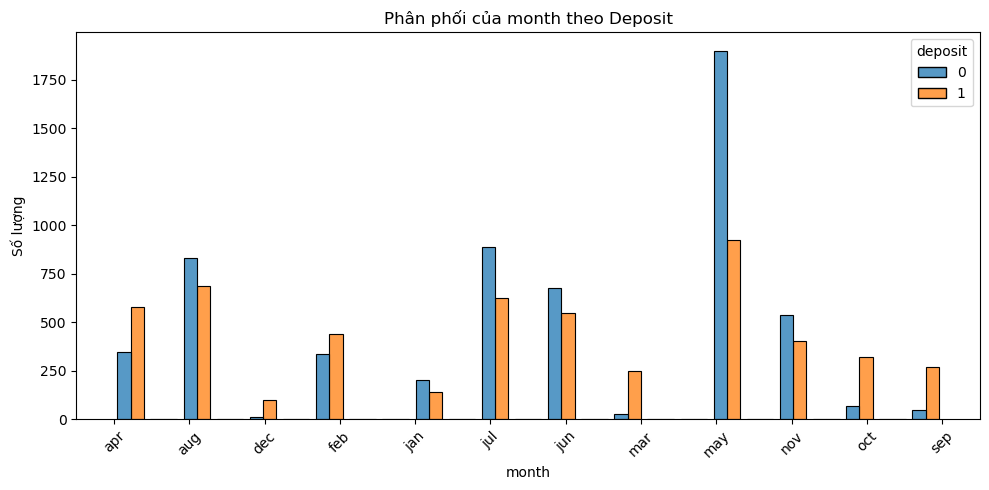

In [59]:
# 9. Phân tích biến rời rạc - Histogram
if len(discrete_vars) > 0:
    plt.figure(figsize=(10, 5))
    for i, var in enumerate(discrete_vars, 1):
        plt.subplot(1, len(discrete_vars), i)
        # Vẽ histogram phân phối biến rời rạc theo deposit
        sns.histplot(data=df, x=var, hue='deposit', multiple='dodge', shrink=0.8)
        plt.title(f'Phân phối của {var} theo Deposit')
        plt.xlabel(var)
        plt.ylabel('Số lượng')
        plt.xticks(ticks=range(len(label_encoders[var].classes_)), labels=label_encoders[var].classes_, rotation=45)
    plt.tight_layout()
    plt.show()

Nhận xét : 
- Tháng 5 (may) có số lượng khách hàng lớn nhất, nhưng tỷ lệ no cao hơn yes (tháng này không thuận lợi cho việc gửi tiền).
- Tháng 3 (mar) và tháng 12 (dec) có tỷ lệ yes cao hơn no (các tháng này thuận lợi hơn).

## 10. Phân tích bằng GLM

In [60]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 10. Phân tích bằng GLM
print("\nKiểm tra giả định cho GLM (binomial):")

# 10.1: Phân phối biến phụ thuộc
print(" - Phân phối của deposit:")
print(df['deposit'].value_counts(normalize=True))

# 10.2: Chia dữ liệu thành tập huấn luyện và kiểm tra
X = df.drop('deposit', axis=1)
y = df['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10.3: Không đa cộng tuyến (VIF cho biến liên tục)
X_train_selected = X_train[continuous_vars + discrete_vars]

X_train_vif = X_train_selected[continuous_vars].copy()
if len(continuous_vars) > 0:
    X_train_vif = sm.add_constant(X_train_vif)
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X_train_vif.columns
    vif_data['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    print("\n - VIF để kiểm tra đa cộng tuyến:")
    print(vif_data)

# 10.4: Độc lập quan sát
print("\n - Độc lập quan sát: Giả định rằng các khách hàng là độc lập (dựa trên thiết kế dữ liệu).")



Kiểm tra giả định cho GLM (binomial):
 - Phân phối của deposit:
deposit
0    0.52616
1    0.47384
Name: proportion, dtype: float64

 - VIF để kiểm tra đa cộng tuyến:
   Variable        VIF
0     const  17.660577
1  duration   1.000287
2   balance   1.013156
3       age   1.013026
4       day   1.000149

 - Độc lập quan sát: Giả định rằng các khách hàng là độc lập (dựa trên thiết kế dữ liệu).


Nhận xét 
1. deposit có 47,38% yes và 52,61% no cho thấy phân phối khá cân bằng.
2. chia tỷ lệ huấn luyện với tỷ lệ 80/20 
3.  VIF(Variance Inflation Factor) cho các biến liên tục.
- Tất cả VIF < 2, rất thấp, cho thấy không có đa cộng tuyến giữa các biến liên tục.
- Điều này đáp ứng giả định của GLM, đảm bảo các biến độc lập không bị phụ thuộc tuyến tính vào nhau.



Chạy GLM (binomial, logit link):

Tóm tắt mô hình GLM:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                deposit   No. Observations:                 8929
Model:                            GLM   Df Residuals:                     8923
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4928.8
Date:                Sat, 19 Apr 2025   Deviance:                       9857.6
Time:                        19:36:55   Pearson chi2:                 1.77e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2437
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

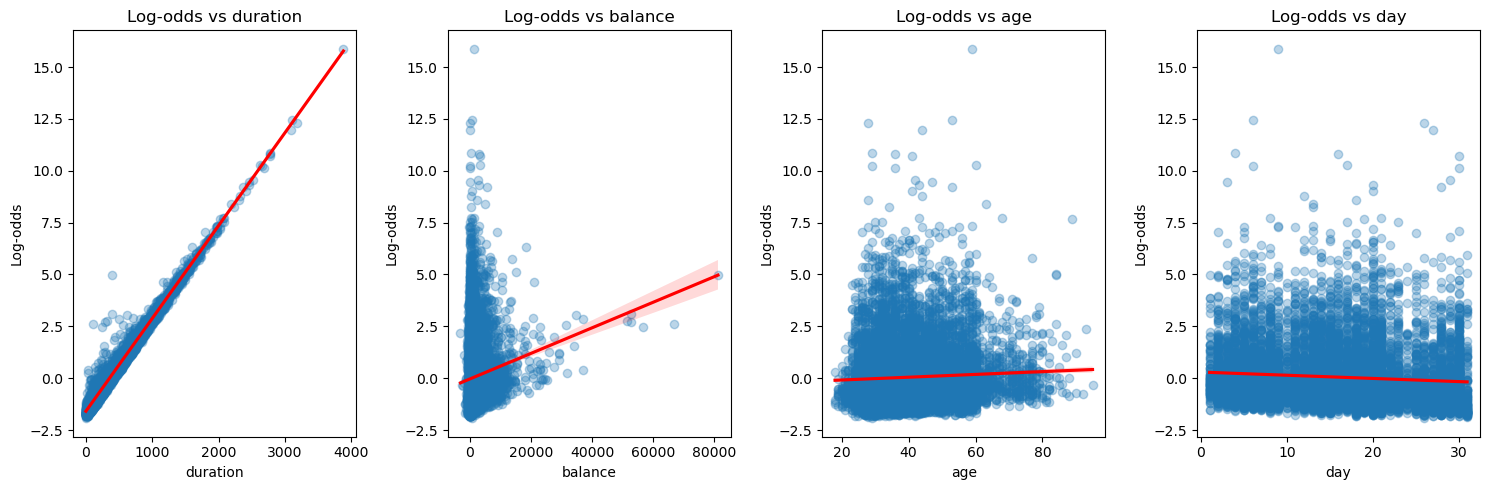

In [61]:
 # 10.5: Chạy GLM với các biến đã chọn
print("\nChạy GLM (binomial, logit link):")
X_train_glm = X_train_selected[continuous_vars + discrete_vars]
X_train_const = sm.add_constant(X_train_glm)

glm_model = sm.GLM(y_train, X_train_const, family=sm.families.Binomial()).fit()
print("\nTóm tắt mô hình GLM:")
print(glm_model.summary())

# 10.6: Kiểm tra tính tuyến tính giữa log-odds và các biến liên tục
print("\nKiểm tra tính tuyến tính của log-odds với các biến liên tục:")
y_pred_prob = glm_model.predict(X_train_const)
log_odds = np.log(y_pred_prob / (1 - y_pred_prob))

if len(continuous_vars) > 0:
    plt.figure(figsize=(15, 5))
    for i, var in enumerate(continuous_vars):
        plt.subplot(1, len(continuous_vars), i+1)
        plt.scatter(X_train[var], log_odds, alpha=0.3)
        sns.regplot(x=X_train[var], y=log_odds, scatter=False, color='red')
        plt.title(f'Log-odds vs {var}')
        plt.xlabel(var)
        plt.ylabel('Log-odds')
    plt.tight_layout()
    plt.show()

Nhận xét: 
1. Tóm tắt mô hình GLM 
- Tất cả các biến đều có ý nghĩa thống kê (p-value < 0.05).
- duration có hệ số dương (0.0045), cho thấy thời gian liên lạc càng dài, khả năng gửi tiền càng tăng.
- month và day có hệ số âm, cho thấy các ngày/tháng cuối có thể làm giảm xác suất gửi tiền.
- balance và age có hệ số dương nhưng rất nhỏ, ảnh hưởng không mạnh.
2. kiểm tra tuyến tính 
Kết quả:
- duration và age có mối quan hệ tuyến tính thuận với log-odds (đường hồi quy dốc lên).
- day có mối quan hệ tuyến tính nghịch (đường hồi quy dốc xuống).
- balance có đường hồi quy gần phẳng, cho thấy mối quan hệ không rõ ràng.
Nhận xét:
- Giả định tính tuyến tính được đáp ứng tốt cho duration, age, và day.
- balance có thể không tuyến tính với log-odds

In [62]:
# 10.7 : Phân tích chi tiết kết quả GLM
print("\nPhân tích chi tiết kết quả GLM:")
results_df = pd.DataFrame({
    'Variable': glm_model.params.index,
    'Coefficient': glm_model.params.values,
    'P-value': glm_model.pvalues.values
})
print(results_df)

# 10.8 : Lọc các biến có ý nghĩa thống kê (p-value < 0.05)
significant_vars = results_df[results_df['P-value'] < 0.05]

# Phân tích hiệu ứng của các biến
print("\nPhân tích hiệu ứng của các biến:")
for index, row in significant_vars.iterrows():
    var = row['Variable']
    coef = row['Coefficient']
    p_val = row['P-value']
    if var != 'const':
        if coef > 0:
            print(f"- Biến {var}: Hệ số = {coef:.6f}, p-value = {p_val:.2e}. Ảnh hưởng thuận: Khi {var} tăng 1 đơn vị, log-odds của deposit tăng {coef:.6f}.")
        else:
            print(f"- Biến {var}: Hệ số = {coef:.6f}, p-value = {p_val:.2e}. Ảnh hưởng nghịch: Khi {var} tăng 1 đơn vị, log-odds của deposit giảm {-coef:.6f}.")



Phân tích chi tiết kết quả GLM:
   Variable  Coefficient        P-value
0     const    -1.540186   3.866140e-42
1  duration     0.004466  4.373656e-308
2   balance     0.000054   5.728101e-10
3       age     0.004522   2.659973e-02
4       day    -0.013167   4.968793e-06
5     month    -0.022213   3.413009e-03

Phân tích hiệu ứng của các biến:
- Biến duration: Hệ số = 0.004466, p-value = 4.37e-308. Ảnh hưởng thuận: Khi duration tăng 1 đơn vị, log-odds của deposit tăng 0.004466.
- Biến balance: Hệ số = 0.000054, p-value = 5.73e-10. Ảnh hưởng thuận: Khi balance tăng 1 đơn vị, log-odds của deposit tăng 0.000054.
- Biến age: Hệ số = 0.004522, p-value = 2.66e-02. Ảnh hưởng thuận: Khi age tăng 1 đơn vị, log-odds của deposit tăng 0.004522.
- Biến day: Hệ số = -0.013167, p-value = 4.97e-06. Ảnh hưởng nghịch: Khi day tăng 1 đơn vị, log-odds của deposit giảm 0.013167.
- Biến month: Hệ số = -0.022213, p-value = 3.41e-03. Ảnh hưởng nghịch: Khi month tăng 1 đơn vị, log-odds của deposit giảm 0.0222

Nhận xét
1. Ảnh hưởng thuận:
- duration: Thời gian liên lạc càng dài, khả năng gửi tiền càng tăng.
- balance và age: Số dư tài khoản và độ tuổi tăng làm tăng nhẹ khả năng gửi tiền, nhưng ảnh hưởng rất nhỏ.
2. Ảnh hưởng nghịch:
- day và month: Các ngày và tháng cuối (giá trị lớn hơn) làm giảm khả năng gửi tiền.

Nhận xét chi tiết :
1. Thời gian liên lạc (duration):
- Ảnh hưởng: Thuận (hệ số = 0.004466, p-value = 4.37e-308).
- Nhận xét: Đây là yếu tố có ảnh hưởng mạnh nhất. Thời gian liên lạc càng dài, khả năng khách hàng gửi tiền càng cao. Điều này cho thấy chất lượng cuộc gọi hoặc mức độ tương tác với khách hàng đóng vai trò quan trọng trong việc thuyết phục họ gửi tiền.
2. Số dư tài khoản (balance):
- Ảnh hưởng: Thuận (hệ số = 0.000054, p-value = 5.73e-10).
- Nhận xét: Số dư tài khoản cao hơn có liên quan đến khả năng gửi tiền cao hơn, nhưng mức độ ảnh hưởng rất nhỏ. Điều này có thể ám chỉ rằng những khách hàng có tài chính ổn định hơn có xu hướng gửi tiền, nhưng không phải là yếu tố quyết định chính.
3. Độ tuổi (age):
- Ảnh hưởng: Thuận (hệ số = 0.004522, p-value = 2.66e-02).
- Nhận xét: Tuổi tác có ảnh hưởng tích cực nhưng yếu. Khách hàng lớn tuổi hơn có xu hướng gửi tiền nhiều hơn, có thể do sự ổn định tài chính hoặc nhu cầu đầu tư dài hạn.
4. Ngày trong tháng (day)
- Ảnh hưởng: Nghịch (hệ số = -0.013167, p-value = 4.97e-06).
- Nhận xét: Các ngày cuối tháng có xu hướng làm giảm khả năng gửi tiền. Điều này có thể liên quan đến việc khách hàng có ít nguồn lực tài chính hơn vào cuối tháng.
5. Tháng trong năm (month):
- Ảnh hưởng: Nghịch (hệ số = -0.022213, p-value = 3.41e-03).
- Nhận xét: Một số tháng cụ thể (như tháng 3 và tháng 12) có xác suất gửi tiền cao hơn đáng kể (gần 0.6), trong khi tháng 5 có xác suất thấp hơn (gần 0.3). Biến tháng cho thấy sự khác biệt rõ rệt trong hành vi gửi tiền, có thể liên quan đến yếu tố mùa vụ hoặc chiến dịch tiếp thị cụ thể.

## 11. Kết luận 

1. Tổng kết:
- Yếu tố quan trọng nhất: Thời gian liên lạc (duration) là yếu tố có tác động mạnh nhất đến quyết định gửi tiền, nhấn mạnh tầm quan trọng của việc xây dựng tương tác chất lượng với khách hàng.
- Yếu tố mùa vụ: Biến tháng (month) cho thấy sự khác biệt rõ rệt, với các tháng như tháng 3 và tháng 12 là thời điểm thuận lợi để triển khai chiến dịch tiếp thị.
- Yếu tố tài chính và nhân khẩu học: Số dư tài khoản (balance) và độ tuổi (age) có ảnh hưởng tích cực nhưng yếu, cho thấy các yếu tố này không phải là động lực chính.
- Yếu tố bất lợi: Các ngày cuối tháng (day) và một số tháng nhất định (như tháng 5) làm giảm khả năng gửi tiền, cần được lưu ý khi lập kế hoạch chiến dịch.

2. Đề xuất:
- Tập trung vào chất lượng tương tác: Tăng cường đào tạo nhân viên để kéo dài và cải thiện chất lượng các cuộc gọi tiếp thị.
- Tối ưu hóa thời điểm: Ưu tiên triển khai chiến dịch vào các tháng có xác suất thành công cao (tháng 3, tháng 12) và tránh các ngày cuối tháng.
- Cá nhân hóa chiến lược: Dù số dư tài khoản và độ tuổi có ảnh hưởng nhỏ, có thể sử dụng thông tin này để cá nhân hóa chiến dịch cho các nhóm khách hàng cụ thể (ví dụ: khách hàng lớn tuổi hoặc có số dư cao).